In [1]:
import tensorflow as tf
tf.__version__
import keras
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [1]:
import os
import tensorflow as tf
import keras
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
#domain [MT2PA,PA2MT]
#version [run_0,run_1,run_2,run_3,run_4]
#component [classifer  dec_sh  dis  enc_ex  enc_sh]
root="/workdir/Data-Guillermo"
models_root=root+"/DADL-MT2PA/models/run_0"


def load_model(domain="MT2PA",version="run_0",component="classifer"):
  os.path.join(root,"DADL-"+domain,"models",version,component+".h5")
  return keras.models.load_model(os.path.join(root,"DADL-"+domain,"models",version,component+".h5"),#compile=False,
                                    custom_objects={'InstanceNormalization':InstanceNormalization})

def load_model_(domain="MT2PA",version="run_0",component="classifer"):
  return os.path.join(root,"DADL-"+domain,"models",version,component+".h5")

Using TensorFlow backend.


In [2]:
model=load_model(domain="MT2PA",version="run_0",component="enc_sh")
model.summary()
model_dec=load_model(domain="MT2PA",version="run_0",component="dec_sh")









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
en

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TypeError: ('Keyword argument not understood:', 'interpolation')

# DADOS

In [79]:
!ls -lha /workdir/Data-Guillermo/
!ls -lha /workdir/Data-Guillermo/'Mato Grosso'
!ls -lha /workdir/Data-Guillermo/'Para'
!ls -lha /workdir/Data-Guillermo/'maranhao'

total 14M
drwxrwxrwx 1 root root 4.0K Oct 14 17:43  .
drwxrwxrwx 1 root root 4.0K Oct  7 14:46  ..
drwxrwxrwx 1 root root 4.0K Sep 18 20:56  DADL-MT2PA
drwxrwxrwx 1 root root 4.0K Sep 18 20:56  DADL-PA2MA
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 'Mato Grosso'
-rwxrwxrwx 1 root root 3.8M Oct 13 01:00 'Mato Grosso-20241013T005742Z-002.zip'
drwxrwxrwx 1 root root 4.0K Oct 14 17:43  Para
-rwxrwxrwx 1 root root 3.5M Oct 13 02:37  Para-20241013T023426Z-002.zip
drwxrwxrwx 1 root root 4.0K Sep 18 20:57  dataset
drwxrwxrwx 1 root root 4.0K Oct 14 17:43  maranhao
-rwxrwxrwx 1 root root 6.1M Oct 14 16:05  maranhao-20241014T160023Z-002.zip
total 16G
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 .
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 ..
-rwxrwxrwx 1 root root  14G Oct 13 01:36 MT_1C_RGB_img_filt_norm_2020_2021_10B-001.npy
-rwxrwxrwx 1 root root 708M Apr 23  2022 MT_1C_ref_2020_2021.npy
-rwxrwxrwx 1 root root 708M Feb 24  2022 test_mask_MT.npy
total 14G
drwxrwxrwx 1 root root 4.0K Oct 14 17:43 .
drwx

In [1]:
#root="/workdir/Data-Guillermo"
root="/workdir/Data-Guillermo/dataset"
import numpy as np
import os
import glob

In [3]:
root="/workdir/Data-Guillermo"
dataset='maranhao'
glob.glob(os.path.join(root,dataset,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] 

'/workdir/Data-Guillermo/maranhao/MA_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'

In [5]:
root="/workdir/Data-Guillermo"
dataset='Para'
X_MA = np.load(
    glob.glob(os.path.join(root,dataset,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

ref_MA = np.load(
    glob.glob(os.path.join(root,dataset,'*ref_2020_2021.npy'))[0] ,
    mmap_mode='r')

mask_MA = np.load(
    glob.glob(os.path.join(root,dataset,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

In [ ]:
plt.imshow(arr[:,:,0])

In [7]:
a = np.load(
    os.path.join(root,'maranhao','test_mask_MA.npy'),
    mmap_mode='r')

In [9]:
np.unique(a)

array([0., 1.], dtype=float32)

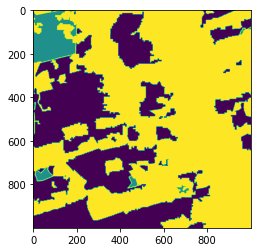

In [6]:
import matplotlib.pyplot as plt
plt.imshow(ref_MA[:1000,:1000])

[0. 1.]


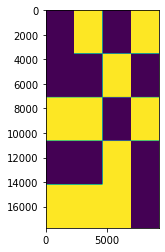

In [71]:
import matplotlib.pyplot as plt
f=18
plt.imshow(mask_MA)
print(np.unique(mask_MA))

In [111]:
from einops import rearrange
from Data_preprocessing import *

In [113]:
get_box_coords(mask_MA,128,dat_set=1)

array([[    0,   128,  2304,  2432],
       [    0,   128,  2432,  2560],
       [    0,   128,  2560,  2688],
       ...,
       [17664, 17792,  6400,  6528],
       [17664, 17792,  6528,  6656],
       [17664, 17792,  6656,  6784]])

In [110]:
import sys
sys.path.append("../Utils")
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt
from Distances import *

Using TensorFlow backend.


In [5]:
x_d1=np.random.uniform(0,1,(1,128,128,20))
x_d2=np.random.uniform(0,1,(1,128,128,20))
z1_sh=model.predict(x_d1)
z2_sh=model.predict(x_d2)

### Maximun Mean Discrepancy

In [6]:
MMD_RF=MMD(kernel=radial_funtion)
MMD_GRF=MMD(kernel=guassian_norm_funtion)

print(MMD_RF.compute(z1_sh,z2_sh))
print(MMD_GRF.compute(z1_sh,z2_sh))

-112.65362
-634541.8808348039


### KL-Divergence

In [7]:
KLD=KL_divergence(Distribution_embedding=general_normal_distribution ,
              Distance_function=Univariate_Normal
             )

print(KLD.compute(z1_sh,z2_sh))

3.037322341192805e-06


### JSD

In [8]:
JSD=Jensen_Shanon_divergence(
    Distribution_embedding=general_normal_distribution,
    Distance_function=Univariate_Normal,
    Mixture_distribution_method=median_gaussian
)

print(JSD.compute(z1_sh,z2_sh))

7.59923017457087e-07


### Contrastive Divergence

In [14]:
CD=Contrastive_Divergence(
    Model=model
)

print(CD.compute(x_d1,x_d2))

[array([[[[-4.58530371e+03, -1.67187415e+03,  9.11253906e+03, ...,
          -1.27575562e+02, -7.52252344e+03,  4.34522095e+02],
         [-2.13739673e+03, -2.17408081e+03,  3.60614551e+03, ...,
           2.06065674e+02, -1.35904629e+04,  4.15415649e+02],
         [-4.75548438e+03, -7.82055542e+02,  4.71002539e+03, ...,
           2.04090088e+02, -1.32227891e+04,  4.42900146e+02],
         ...,
         [-7.26581836e+03, -1.10229016e+03,  1.61329102e+03, ...,
           1.30300171e+02, -1.08093301e+04,  4.02143066e+02],
         [-4.96542285e+03, -2.12394946e+03,  4.94483203e+03, ...,
          -3.10742981e+02, -1.34385537e+04,  4.24314941e+02],
         [-4.33532275e+03, -5.65911133e+02,  5.29165918e+03, ...,
           2.11274658e+02, -1.09361963e+04,  4.24043945e+02]],

        [[-5.88633789e+03,  4.01583740e+02,  3.62820605e+03, ...,
           1.94640625e+02, -7.21122656e+03,  4.30788208e+02],
         [-2.43768701e+03, -1.77753894e+03,  6.70939453e+02, ...,
           2.87237671

In [71]:
distances=CD.compute(x_d1,x_d2)


In [72]:
print(len(distances))

60


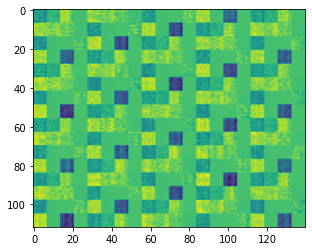

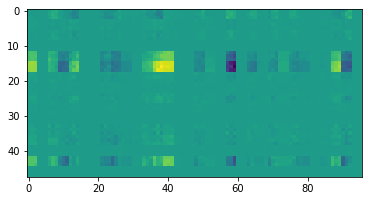

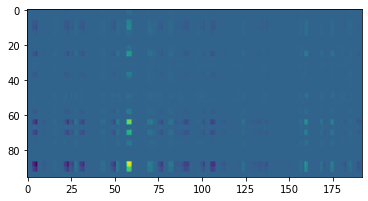

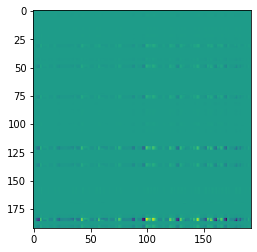

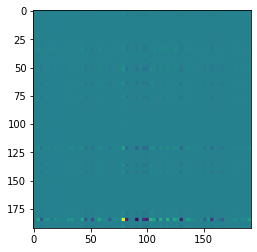

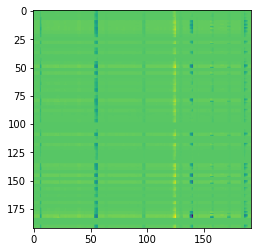

In [64]:
plt.figure()
plt.imshow(rearrange(rearrange(distances[0],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=16,cio2=20))
plt.figure()
plt.imshow(rearrange(rearrange(distances[4],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=16,cio2=32))
plt.figure()
plt.imshow(rearrange(rearrange(distances[8],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=32,cio2=64))
plt.figure()
plt.imshow(rearrange(rearrange(distances[12],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=64,cio2=64))


plt.figure()
plt.imshow(rearrange(rearrange(distances[20],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=64,cio2=64))


plt.figure()
plt.imshow(rearrange(rearrange(distances[56],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=64,cio2=64))

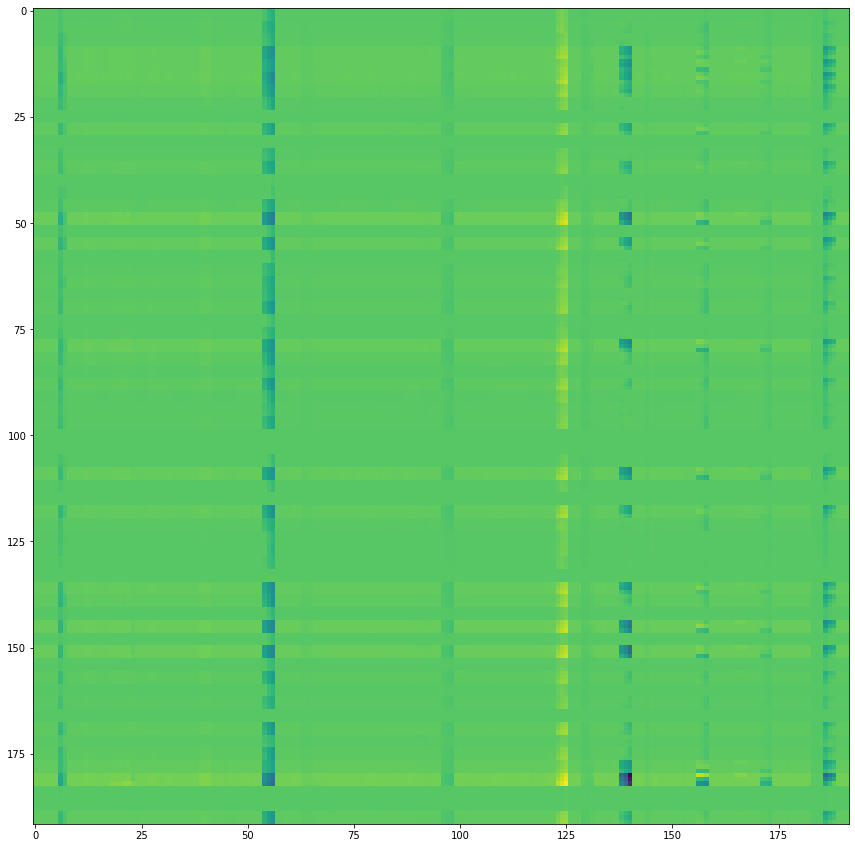

In [65]:
plt.figure(figsize=(15,15))
plt.imshow(rearrange(rearrange(distances[56],"w h ci co -> w h (ci co)"),"w h (cio1 cio2)  ->(cio1 w) ( cio2 h )",cio1=64,cio2=64))

In [69]:
print(distances[56].min())
print(distances[56].max())

-39378.94
13880.4375


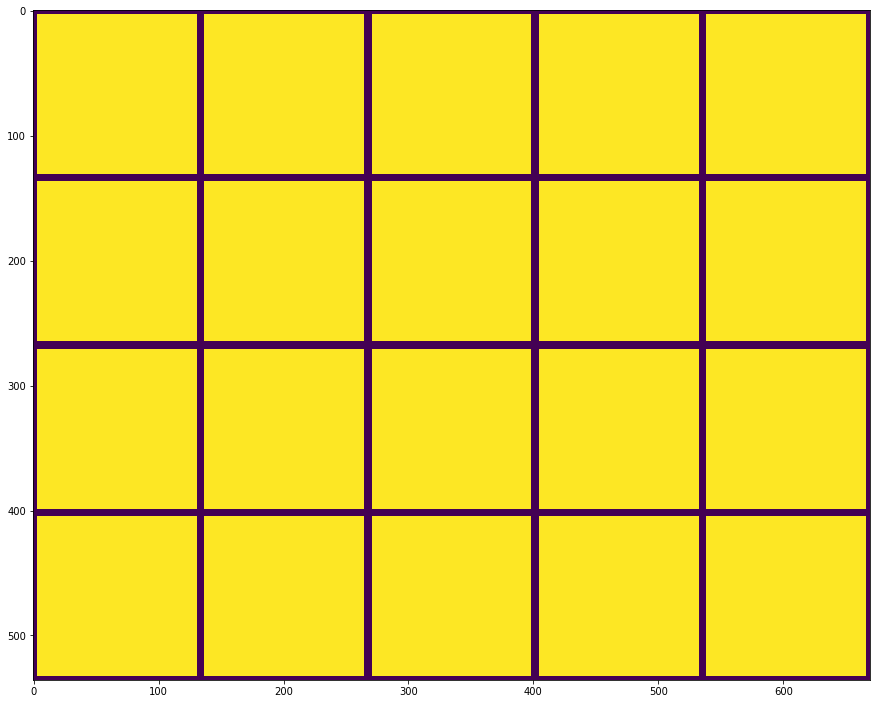

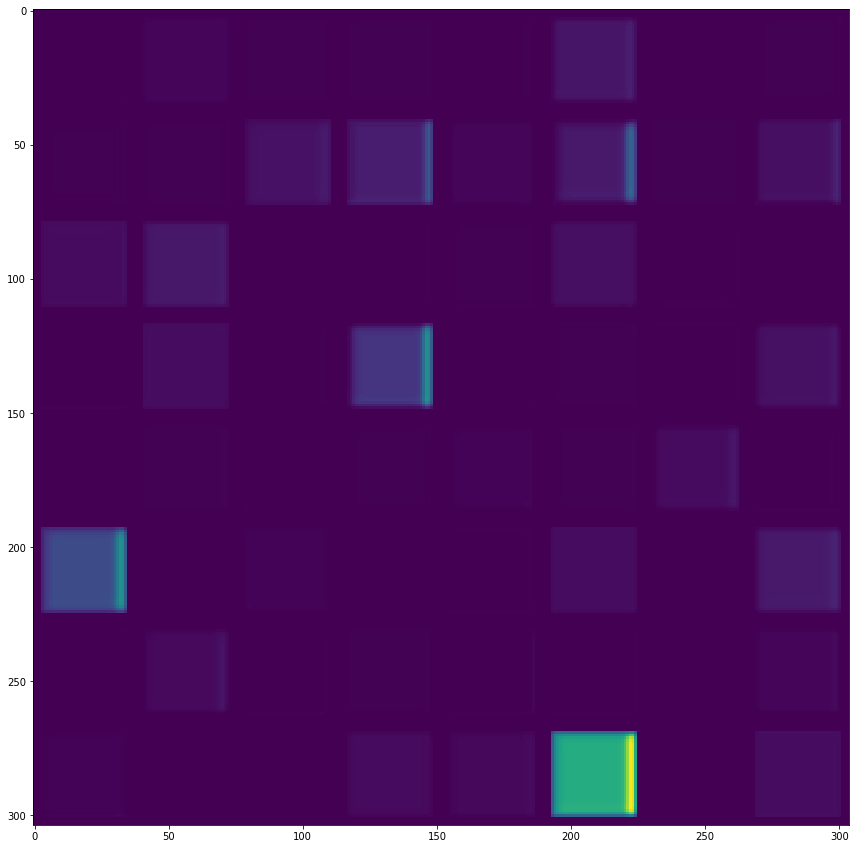

In [108]:
x=np.random.uniform(0,5,(1,128,128,20))
x=np.ones((1,128,128,20))
z_sh=model.predict(x)

plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(x[0], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #x[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=4,d2=5
    )
)

plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(z_sh[0], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #z_sh[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=8,d2=8))

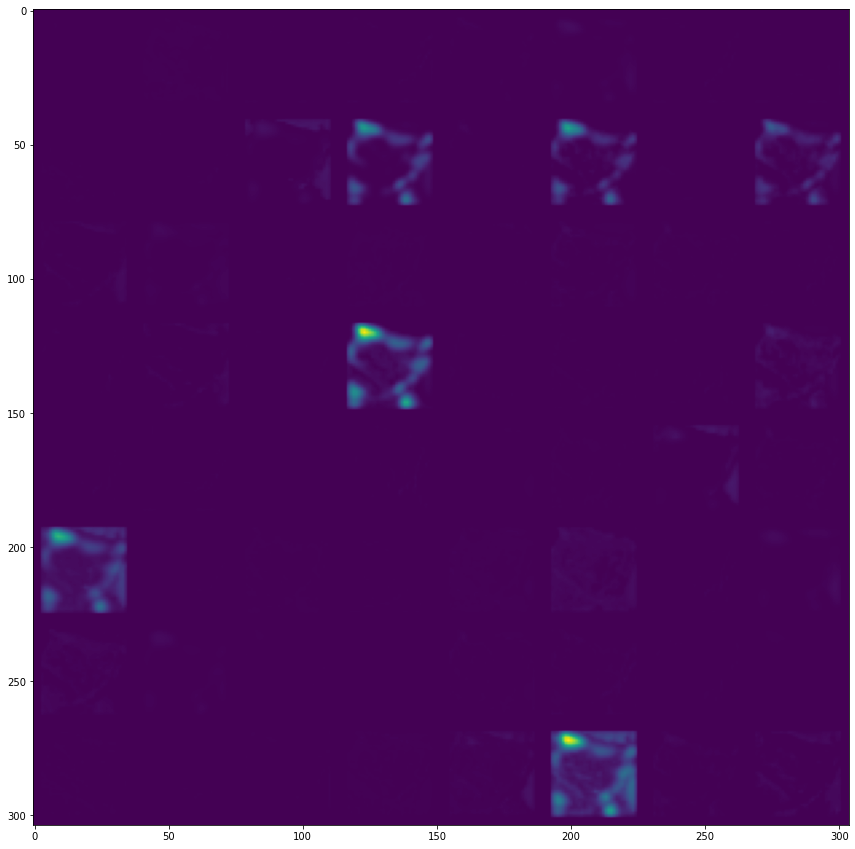

In [22]:
from einops import rearrange
plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(z_sh_b[3], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #z_sh[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=8,d2=8))

# DISTANCE COMPUTATION

## MT PA

In [1]:
import sys
sys.path.append("../Utils")
import numpy as np
import glob
import os
from Data_preprocessing import get_box_coords
from Data_preprocessing import load_model

Using TensorFlow backend.


In [2]:
root="/workdir/Data-Guillermo"
dataset_1='Para'
dataset_2='Mato Grosso'
X_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

data_1=get_box_coords(mask_1,128,dat_set=0)

X_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

data_2=get_box_coords(mask_2,128,dat_set=0)

In [29]:
#MT2PA,PA2MT
domain="MT2PA"
version="run_0"
component="enc_sh"
model=load_model(domain="MT2PA",version="run_0",component="enc_sh")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
enc_sh_con

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Shared space computation

### MT2PA

In [54]:
origin="PA"
batch_size=10
X_d=X_1
data_d=data_1
#for b in range(int(len(data_1)/5)):
for b in range(int(len(data_1)/batch_size)):
    batch=data_1[b:b+batch_size]
    x_b=np.array(list(map(lambda c:X_1[c[0]:c[1],c[2]:c[3]],batch)))
    z_sh_b=model.predict(x_b)
    print("creating")
    print("{}_{}_batch_{}.npy".format(domain,version,str(b)))
    np.save(os.path.join(root,"latent_spaces","{}_{}_{}_batch_{}.npy".format(origin,domain,version,str(b))),z_sh_b)

creating
PA2MT_run_0_batch_0.npy
creating
PA2MT_run_0_batch_1.npy
creating
PA2MT_run_0_batch_2.npy
creating
PA2MT_run_0_batch_3.npy
creating
PA2MT_run_0_batch_4.npy
creating
PA2MT_run_0_batch_5.npy
creating
PA2MT_run_0_batch_6.npy
creating
PA2MT_run_0_batch_7.npy
creating
PA2MT_run_0_batch_8.npy
creating
PA2MT_run_0_batch_9.npy
creating
PA2MT_run_0_batch_10.npy
creating
PA2MT_run_0_batch_11.npy
creating
PA2MT_run_0_batch_12.npy
creating
PA2MT_run_0_batch_13.npy
creating
PA2MT_run_0_batch_14.npy
creating
PA2MT_run_0_batch_15.npy
creating
PA2MT_run_0_batch_16.npy
creating
PA2MT_run_0_batch_17.npy
creating
PA2MT_run_0_batch_18.npy
creating
PA2MT_run_0_batch_19.npy
creating
PA2MT_run_0_batch_20.npy
creating
PA2MT_run_0_batch_21.npy
creating
PA2MT_run_0_batch_22.npy
creating
PA2MT_run_0_batch_23.npy
creating
PA2MT_run_0_batch_24.npy
creating
PA2MT_run_0_batch_25.npy
creating
PA2MT_run_0_batch_26.npy
creating
PA2MT_run_0_batch_27.npy
creating
PA2MT_run_0_batch_28.npy
creating
PA2MT_run_0_bat

creating
PA2MT_run_0_batch_238.npy
creating
PA2MT_run_0_batch_239.npy
creating
PA2MT_run_0_batch_240.npy
creating
PA2MT_run_0_batch_241.npy
creating
PA2MT_run_0_batch_242.npy
creating
PA2MT_run_0_batch_243.npy
creating
PA2MT_run_0_batch_244.npy
creating
PA2MT_run_0_batch_245.npy
creating
PA2MT_run_0_batch_246.npy
creating
PA2MT_run_0_batch_247.npy
creating
PA2MT_run_0_batch_248.npy
creating
PA2MT_run_0_batch_249.npy
creating
PA2MT_run_0_batch_250.npy
creating
PA2MT_run_0_batch_251.npy
creating
PA2MT_run_0_batch_252.npy
creating
PA2MT_run_0_batch_253.npy
creating
PA2MT_run_0_batch_254.npy
creating
PA2MT_run_0_batch_255.npy
creating
PA2MT_run_0_batch_256.npy
creating
PA2MT_run_0_batch_257.npy
creating
PA2MT_run_0_batch_258.npy
creating
PA2MT_run_0_batch_259.npy
creating
PA2MT_run_0_batch_260.npy
creating
PA2MT_run_0_batch_261.npy
creating
PA2MT_run_0_batch_262.npy
creating
PA2MT_run_0_batch_263.npy
creating
PA2MT_run_0_batch_264.npy
creating
PA2MT_run_0_batch_265.npy
creating
PA2MT_run_0

In [55]:
origin="MT"
batch_size=10
X_d=X_2
data_d=data_2
#for b in range(int(len(data_1)/5)):
for b in range(int(len(data_1)/batch_size)):
    batch=data_d[b:b+batch_size]
    x_b=np.array(list(map(lambda c:X_d[c[0]:c[1],c[2]:c[3]],batch)))
    z_sh_b=model.predict(x_b)
    print("creating")
    print("{}_{}_batch_{}.npy".format(domain,version,str(b)))
    np.save(os.path.join(root,"latent_spaces","{}_{}_{}_batch_{}.npy".format(origin,domain,version,str(b))),z_sh_b)

creating
PA2MT_run_0_batch_0.npy
creating
PA2MT_run_0_batch_1.npy
creating
PA2MT_run_0_batch_2.npy
creating
PA2MT_run_0_batch_3.npy
creating
PA2MT_run_0_batch_4.npy
creating
PA2MT_run_0_batch_5.npy
creating
PA2MT_run_0_batch_6.npy
creating
PA2MT_run_0_batch_7.npy
creating
PA2MT_run_0_batch_8.npy
creating
PA2MT_run_0_batch_9.npy
creating
PA2MT_run_0_batch_10.npy
creating
PA2MT_run_0_batch_11.npy
creating
PA2MT_run_0_batch_12.npy
creating
PA2MT_run_0_batch_13.npy
creating
PA2MT_run_0_batch_14.npy
creating
PA2MT_run_0_batch_15.npy
creating
PA2MT_run_0_batch_16.npy
creating
PA2MT_run_0_batch_17.npy
creating
PA2MT_run_0_batch_18.npy
creating
PA2MT_run_0_batch_19.npy
creating
PA2MT_run_0_batch_20.npy
creating
PA2MT_run_0_batch_21.npy
creating
PA2MT_run_0_batch_22.npy
creating
PA2MT_run_0_batch_23.npy
creating
PA2MT_run_0_batch_24.npy
creating
PA2MT_run_0_batch_25.npy
creating
PA2MT_run_0_batch_26.npy


ValueError: could not broadcast input array from shape (128,128,20) into shape (128)

###  PA2MT

In [36]:
domain="PA2MT"
version="run_0"
component="enc_sh"
model=load_model(domain=domain,version=version,component="enc_sh")
model.summary()

OSError: Unable to open file (unable to open file: name = '/workdir/Data-Guillermo/DADL-PA2MT/models/run_0/enc_sh.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
root="/workdir/Data-Guillermo"
dataset_1='Para'
dataset_2='Mato Grosso'
X_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

data_1=get_box_coords(mask_1,128,dat_set=0)

X_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

data_2=get_box_coords(mask_2,128,dat_set=0)

### Maximum Mean Discrepancy

In [6]:
data_2.shape

(5420, 4)

In [56]:
MT_sh=glob.glob(os.path.join(root,"latent_spaces","MT*"))
PA_sh=glob.glob(os.path.join(root,"latent_spaces","PA*"))

27

In [61]:
from Distances import MMD,radial_funtion,guassian_norm_funtion

MMD_RF=MMD(kernel=radial_funtion)
MMD_Dist=[]
for mt,pa in zip(MT_sh[:27] , PA_sh[:27] ):
    print(np.mean(np.load(mt)))
    print(MMD_RF.compute(np.load(mt),np.load(pa)))
    MMD_Dist.append(MMD_RF.compute(np.load(mt),np.load(pa)))
    

0.57004774
-1074.9625
0.5593254
-1074.3478
0.5576323
-1051.7532
0.566918
-1006.0461
0.5749718
-1014.3175
0.5781232
-1005.03577
0.583243
-1015.7601
0.58825505
-1011.2256
0.5956833
-1017.1122
0.61332864
-1000.0293
0.6272854
-999.70526
0.6261116
-989.71423
0.56077784
-938.9279
0.62778825
-1006.78284
0.6295669
-1003.8795
0.62757504
-982.3377
0.6348148
-977.3413
0.6422226
-978.3869
0.64855015
-974.1615
0.6466473
-987.95215
0.5592073
-1002.9017
0.5539416
-1020.61084
0.5471622
-1014.58124
0.5485724
-1001.891
0.5445961
-1016.5792
0.5377859
-1104.1792
0.54219306
-1097.097


In [63]:
np.mean(np.array(MMD_Dist))

-1013.61554

### KL-divergence

In [67]:
from Distances import KL_divergence,general_normal_distribution,Univariate_Normal

KLD=KL_divergence(Distribution_embedding=general_normal_distribution ,
              Distance_function=Univariate_Normal
             )

KLD_Dist=[]
for mt,pa in zip(MT_sh[:27] , PA_sh[:27] ):
    print(KLD.compute(np.load(mt),np.load(pa)))
    KLD_Dist.append(KLD.compute(np.load(mt),np.load(pa)))
    
np.mean(np.array(KLD_Dist))

0.0019975911107456
0.0015679233124913372
0.0009290088892864867
0.0005753445556988535
0.0008094847480142331
0.0008627131373210029
0.0010324104849434024
0.0011446218638813122
0.0012115804647372386
0.0014774784246864847
0.0019427646039557045
0.0020327279082943406
0.0004161719997544111
0.002302917162378182
0.0019062533466058795
0.0017392024138638273
0.0018679458732866472
0.0018792606776913967
0.0020255497931612743
0.0020213656731034035
0.0011538279166614096
0.0011788050943182249
0.0011907750441726428
0.0010203383046809567
0.0011387157600599718
0.0011862268359127404
0.0011135171324931914


0.0013972045382296353

### Jensen-Shanon Divergence


In [66]:
from Distances import Jensen_Shanon_divergence,general_normal_distribution,Univariate_Normal,median_gaussian
JSD=Jensen_Shanon_divergence(
    Distribution_embedding=general_normal_distribution,
    Distance_function=Univariate_Normal,
    Mixture_distribution_method=median_gaussian
)

JSD_Dist=[]
for mt,pa in zip(MT_sh[:27] , PA_sh[:27] ):
    print(JSD.compute(np.load(mt),np.load(pa)))
    JSD_Dist.append(JSD.compute(np.load(mt),np.load(pa)))
    
np.mean(np.array(JSD_Dist))

0.000513947204185683
0.00040210307272686707
0.0002368814069887426
0.0001447248606932794
0.00020445762399656786
0.0002186639037167759
0.00026213848707384857
0.0002909676145744222
0.0003073067443618016
0.00037234018228415877
0.0004874620906892835
0.0005056303995144007
0.00010445832552280487
0.000591008653610503
0.0004762985555036292
0.00043506675501264747
0.00046826935749533227
0.0004709352162180491
0.0005094786300203769
0.000513363525182664
0.0002949521123029597
0.00030134353268895797
0.00030445612421559076
0.0002603796514736856
0.0002911227317752285
0.00030342108258812894
0.00028457276691667976


0.0003539166893086322

### Contrastive Divergence

In [ ]:
from Distances import Contrastive_Divergence
domain="MT2PA"
version="run_0"
component="enc_sh"
model=load_model(domain="MT2PA",version="run_0",component="enc_sh")
model.summary()

CD=Contrastive_Divergence(
    Model=model
)

root="/workdir/Data-Guillermo"
dataset_1='Para'
dataset_2='Mato Grosso'
X_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_1 = np.load(
    glob.glob(os.path.join(root,dataset_1,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

data_1=get_box_coords(mask_1,128,dat_set=0)

X_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'*_1C_RGB_img_filt_norm_2020_2021_10B-001.npy'))[0] ,
    mmap_mode='r')

mask_2 = np.load(
    glob.glob(os.path.join(root,dataset_2,'test_mask_*.npy'))[0] ,
    mmap_mode='r')

data_2=get_box_coords(mask_2,128,dat_set=0)

batch_size=5
CD_dists=[]
for b in range(len(data_1)//5):
#for b in range(2):
    b_1=data_1[b:b+batch_size]
    b_2=data_2[b:b+batch_size]
    x_1=np.array(list(map(lambda c:X_1[c[0]:c[1],c[2]:c[3]],b_1)))
    x_2=np.array(list(map(lambda c:X_2[c[0]:c[1],c[2]:c[3]],b_2)))
    #z_sh_b=model.predict(x_b)
    
    print(CD.compute(x_1,x_2))
    CD_dists.append(CD.compute(x_1,x_2))
np.mean(np.array(CD_dists))

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
enc_sh_con

-335743.72
-324406.8
-326116.88
-280328.6
-271008.12
-244955.47
-217206.2


In [69]:
print(len(mask_1))
print(len(mask_2))

17730
19430
